# Diabetes Prediction

# importing Libraries

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

# Reading and Analyzing Data

In [2]:
dt= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Personal/Diabetes Predictor/diabetes_data_upload.csv")

In [3]:
dt

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [4]:
dt.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [6]:
dt.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


# EDA

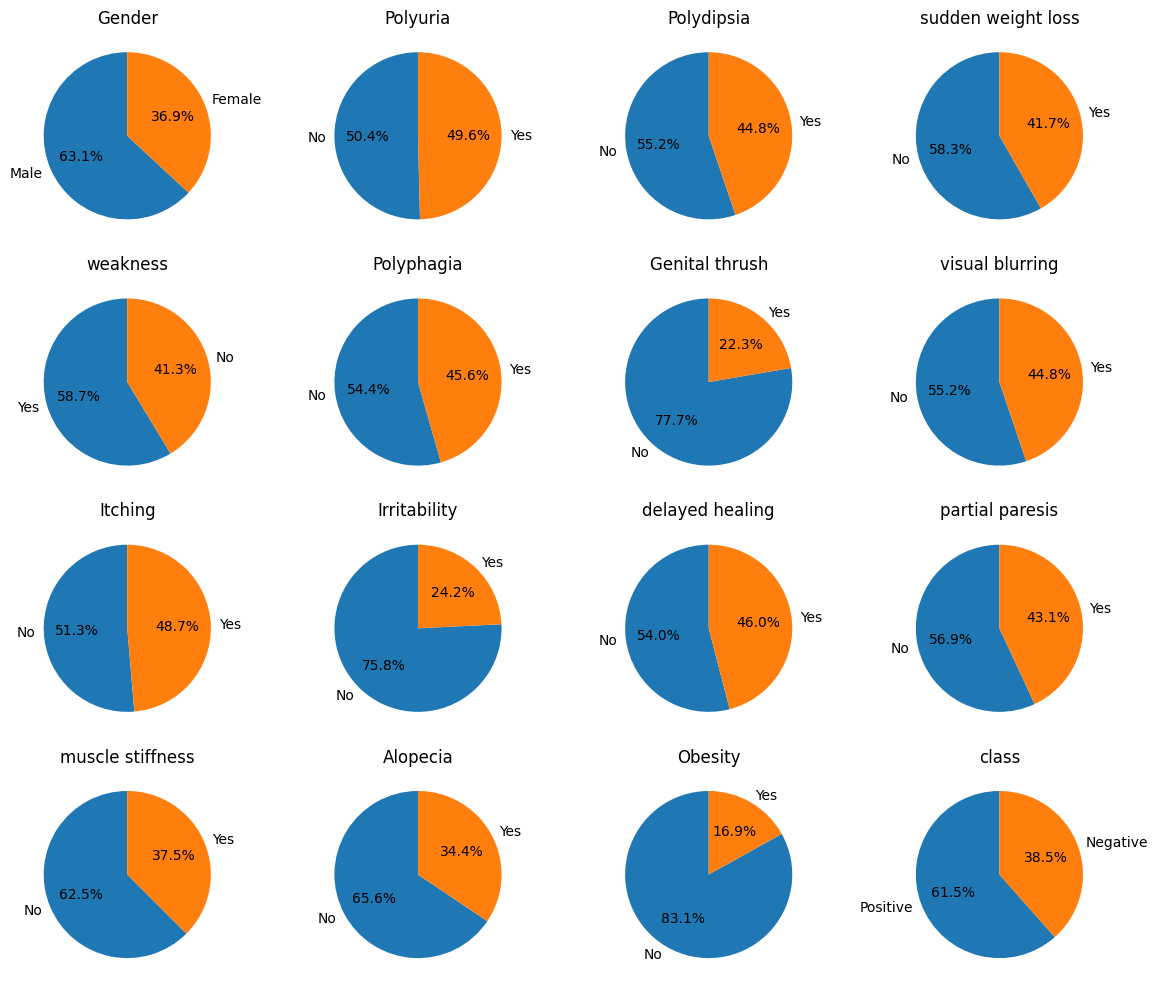

In [7]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 10))

axes = axes.flatten()

for i, col in enumerate(dt.columns[1:17]):

    counts = dt[col].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

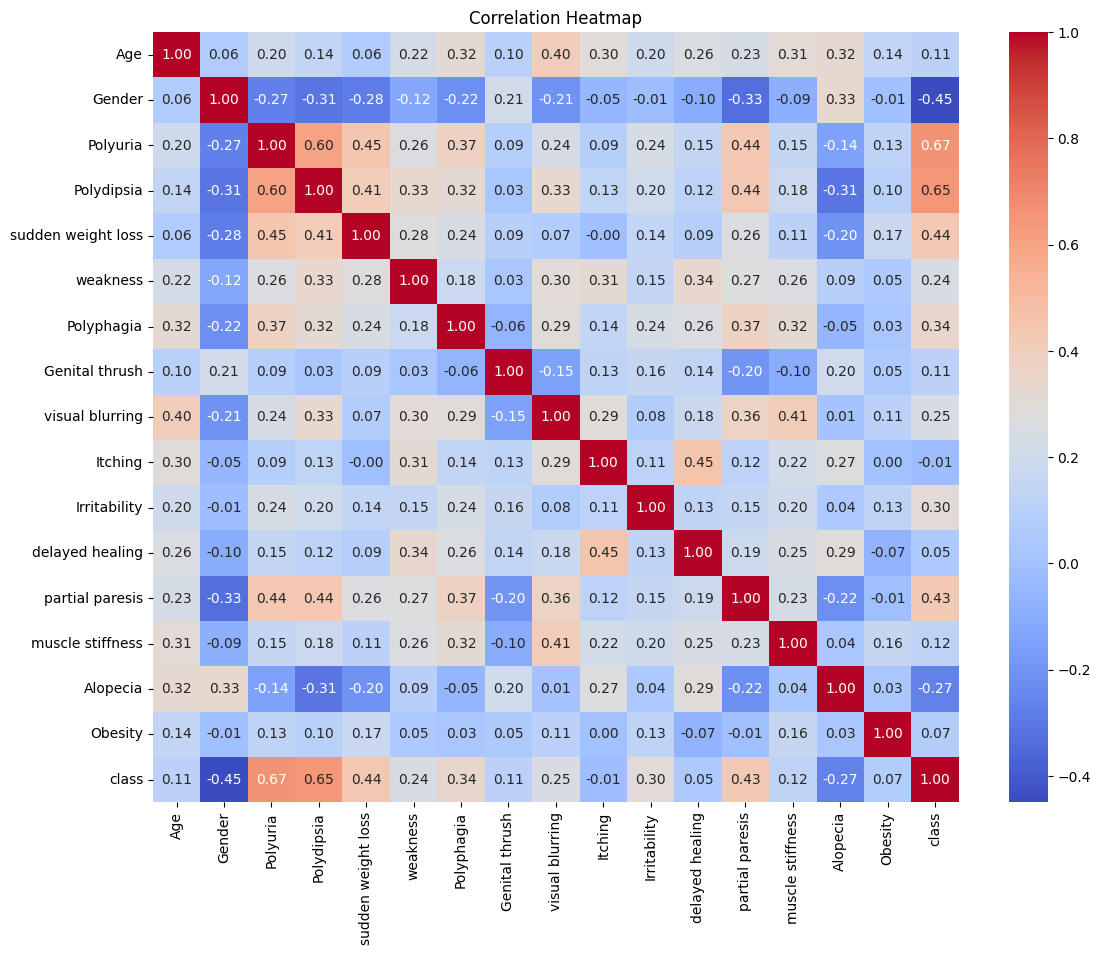

In [8]:
# Create a copy of the original dataframe
encoded_data = dt.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column
for col in encoded_data.columns:
    # Check if the column is categorical
    if encoded_data[col].dtype == 'object':
        # Apply label encoding
        encoded_data[col] = label_encoder.fit_transform(encoded_data[col])

# Calculate correlation matrix
correlation_matrix = encoded_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(13, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [9]:
encoded_data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [10]:
encoded_data.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Splitting Data

In [15]:
from sklearn.model_selection import train_test_split

# Splitting features (X) and target variable (y)
X = encoded_data.drop(columns=['class'])  # Features
y = encoded_data['class']  # Target variable




In [16]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Print the shapes of train and test sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (416, 16)
y_train shape: (416,)
X_test shape: (104, 16)
y_test shape: (104,)


# Model

In [27]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
logreg_model = LogisticRegression()

# Train the model
logreg_model.fit(X_train, y_train)

# Evaluate the model
logreg_accuracy = logreg_model.score(X_test, y_test)
print("Logistic Regression Accuracy:", logreg_accuracy)


Logistic Regression Accuracy: 0.9230769230769231


In [28]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

# Evaluate the model
knn_accuracy = knn_model.score(X_test, y_test)
print("KNN Accuracy:", knn_accuracy)


KNN Accuracy: 0.8557692307692307


In [29]:
from sklearn.neural_network import MLPClassifier

# Initialize the MLP (Multi-Layer Perceptron) classifier
mlp_model = MLPClassifier()

# Train the model
mlp_model.fit(X_train, y_train)

# Evaluate the model
mlp_accuracy = mlp_model.score(X_test, y_test)
print("Neural Network Accuracy:", mlp_accuracy)


Neural Network Accuracy: 0.9326923076923077


In [30]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the Extra Trees classifier with desired parameters
extra_trees_model = ExtraTreesClassifier(n_estimators=100, criterion='gini',
                                         max_depth=3, min_samples_split=2,
                                         min_samples_leaf=3,
                                         bootstrap=True, random_state=42)

# Train the model
extra_trees_model.fit(X_train, y_train)

# Evaluate the model
extra_trees_accuracy = extra_trees_model.score(X_test, y_test)
print("Extra Trees Accuracy:", extra_trees_accuracy)


Extra Trees Accuracy: 0.9038461538461539


In [32]:
from sklearn.ensemble import VotingClassifier

# Create a list of tuples containing the model name and the trained model
models = [
    ('Logistic Regression', logreg_model),
    ('KNN', knn_model),
    ('Neural Network', mlp_model),
    ('Extra Trees', extra_trees_model)
]

# Initialize the VotingClassifier
voting_classifier = VotingClassifier(estimators=models, voting='soft')

# Train the VotingClassifier
voting_classifier.fit(X_train, y_train)

# Evaluate the VotingClassifier
voting_accuracy = voting_classifier.score(X_test, y_test)
print("Voting Ensemble Accuracy:", voting_accuracy)


Voting Ensemble Accuracy: 0.9230769230769231


In [34]:
import pickle

# Save the ensemble model to a file
with open('voting_ensemble_model.pkl', 'wb') as f:
    pickle.dump(voting_classifier, f)
